# Manual prediction using pretrained models

**Don't click run all**

Either: load a GAN using `.load()` from a specified run folder, which will take the latest trained weights

Or: load a GAN using `.loadCombinedFromCheckpoint()` for a specific checkpoint. The lattter may be more preferable as it gives you more fine grained control

*Note:* Please make sure the generator type is set to the same one as the model you are loading. 

In [7]:
%load_ext autoreload
%autoreload 2


import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import matplotlib.pyplot as plt 
import cv2
import numpy as np

from model import CycleGan, GenType
from loader import KindaLoadEverything, Sampler, Loader

import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

gan = CycleGan(genType=GenType.UNET)
# gan = CycleGan(genType=GenType.HCDENS)

# gan.loadCombinedFromCheckpoint("./run/0003/weights/weights-40.h5")  # pretty decent looking, if rough
gan.loadCombinedFromCheckpoint("./run/0004/weights/weights-21.h5")  # decent looking, and better
# gan.loadCombinedFromCheckpoint("./run/0003/weights/weights-40.h5") 
# gan.loadCombinedFromCheckpoint("./run/0005-RESNET/weights/weights-5.h5")  # slightly less good
# gan.loadCombinedFromCheckpoint("./run/0005-RESNET/weights/weights-65.h5")  
# gan.loadCombinedFromCheckpoint("./run/0010-DEFORM-DENS/weights/weights-60.h5")
# gan.loadCombinedFromCheckpoint("./run/0012-DENS/weights/weights-72.h5")
# gan.loadCombinedFromCheckpoint("./run/0017-DENSENET-MSLE/weights/weights-80.h5")
# gan.loadCombinedFromCheckpoint("./run/0017-DENSENET-MSLE/weights/weights.h5")
# gan.loadCombinedFromCheckpoint("./run/0010-DEFORM-DENS/weights/weights-60.h5")



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Monkeys

A sample to show manually loading in images, and passing them through the network. If your image is not 128x128, then you'll have to resize.

In [10]:
ldr = Loader(None, None)

def getimg(i):
    im = ldr.imread(i, cv2.IMREAD_ANYCOLOR)
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

monke = getimg("./data/monke.png")
monke_bw = getimg("./data/monke-bw.png")
mol = getimg("./data/monke-outline.png")
mol2 = getimg("./data/monke-outline-two.png")

monkes = np.array([monke, monke_bw, mol, mol2])

converted = gan.gAB(monkes)

outMonke = converted[0].numpy()
outMonke_bw = converted[1].numpy()
outmol = converted[2].numpy()
outmol2 = converted[3].numpy()

nm = lambda x: (x + 1) / 2


fig,ax = plt.subplots(4,2)
fig.set_size_inches(8,16)
ax[0][0].imshow(nm(monke))
ax[0][0].set_title("Original Monke")
ax[0][1].imshow(nm(outMonke))
ax[0][1].set_title("Conv monke")
ax[1][0].imshow(nm(monke_bw))
ax[1][0].set_title("Monke BW")
ax[1][1].imshow(nm(outMonke_bw))
ax[1][1].set_title("Conv monke bw")
ax[2][0].imshow(nm(mol))
ax[2][0].set_title("Monke line")
ax[2][1].imshow(nm(outmol))
ax[2][1].set_title("Conv monke line")
ax[3][0].imshow(nm(mol2))
ax[3][0].set_title("Monke line2")
ax[3][1].imshow(nm(outmol2))
ax[3][1].set_title("Conv monke line2")

Text(0.5, 1.0, 'Conv monke line2')

Error in callback <function flush_figures at 0x7f0aec1cdb80> (for post_execute):


KeyboardInterrupt: 

### Strings

Automatically convert a string of words into images and pass through the model.

This stitches them horizontally.

Images shape: (64, 128, 128, 3)
2/2 [==============================] - 0s 5ms/step
Output shape: (64, 128, 128, 3)


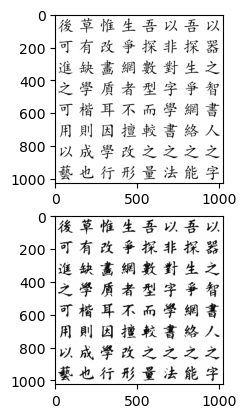

In [14]:

sampler = Sampler("./data/simkai.ttf")
# sampler = Sampler("./data/fangzheng.ttf")
# sampler = Sampler("./data/notoserif-korean.otf")
# sampler = Sampler("./data/comicsans.TTF")

# SUTRINGU = "天不生我許新年大奉萬古如長夜"
# SUTRINGU = "床前明月光疑是地上霜舉頭望明月低頭思故鄉"
# SUTRINGU = "床前明月光李白爬上床看见X光，裤子掉光光"
# SUTRINGU = "三更燈火五更鷄正是男兒讀書時黑髮不知勤學早白首方悔讀書遲"
# SUTRINGU = "Hello World"
# SUTRINGU = "序言"
"""
以器之智書人之字
吾探生爭網絡之能
以非對字學書之法
吾探數型而較之量
生爭網者不擅改形
惟改畵貭耳因學行
草有缺學楷則成也
後可進之可用以藝
"""

SUTRINGU = "以器之智書人之字吾探生爭網絡之能以非對字學書之法吾探數型而較之量生爭網者不擅改形惟改畵貭耳因學行草有缺學楷則成也後可進之可用以藝"

COLUMNS = 8

original = np.array(sampler.generateImages(SUTRINGU, shrink=30))
originalStitched = sampler.stitchImagesVert(original, columns=COLUMNS)
converted = gan.predict(sampler, SUTRINGU)
stitched = sampler.stitchImagesVert(converted, columns=COLUMNS)

fig, ax = plt.subplots(2,1)
ax[0].imshow(originalStitched)
ax[1].imshow(stitched)

### Saving

Saves the raw generated string images.

In [11]:
# write the PLOT
location = "./images/"
location += input("Image name: ") + ".png"
fig.savefig(location, format="png")

In [15]:
# write the MACHINE GENERATED IMAGE
location = "./images/"
location += input("Image name: ") + ".png"
cv2.imwrite(location, stitched*255)

True

In [11]:
# write the ORIGINAL FONT IMAGE
location = "./images/"
location += input("Image name: ") + ".png"
cv2.imwrite(location, originalStitched)

True